In [8]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as torchdata
import numpy as np

torch.manual_seed(1)

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

### 토이 데이터 생성 

In [232]:
x1 = torch.arange(1,101) + torch.randn(100)
x2 = torch.cat([torch.zeros(50)+torch.abs(torch.randn(50)),torch.ones(50)-torch.abs(torch.randn(50))])
x = torch.cat([x1.unsqueeze(1),x2.unsqueeze(1)],1)
x = Variable(x)

y = torch.cat([torch.zeros(50),torch.ones(50)])
y = Variable(y).unsqueeze(1)

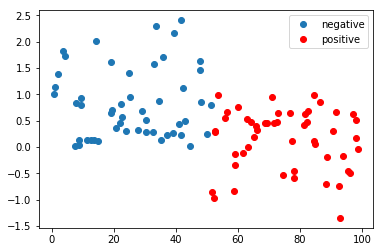

In [245]:
fig, ax = plt.subplots()
ax.plot(x[:,0].data.numpy()[:50],x[:,1].data.numpy()[:50],'o',label='negative')
ax.plot(x[:,0].data.numpy()[50:],x[:,1].data.numpy()[50:],'ro',label='positive')
ax.legend()
plt.show()

### TODO:토치 데이터와 데이터 로더 사용하기 

In [3]:
data = np.loadtxt('./logstic_data.csv',
                        delimiter=',', dtype=np.float32)

In [9]:
class LogisticDataset(torchdata.Dataset):
    def __init__(self):
        # TODO
        pass
    
    def __getitem__(self, index):
        # TODO
        return None
        
    def __len__(self):
        # TODO
        return 0

### 모델링 

In [234]:
model = nn.Sequential(nn.Linear(2,1),nn.Sigmoid())

for param in model.parameters():
    print(param)

Parameter containing:
-0.3516 -0.2785
[torch.FloatTensor of size 1x2]

Parameter containing:
 0.4458
[torch.FloatTensor of size 1]



### 트레이닝 

In [235]:
LEARNING_RATE=0.01
EPOCH = 2000

loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(),lr=LEARNING_RATE)

$$loss(o, t) = - 1/n \sum_i (t[i] * log(o[i]) + (1 - t[i]) * log(1 - o[i]))$$

In [243]:
for epoch in range(EPOCH):
    model.zero_grad()
    pred = model(x)
    loss = loss_function(pred,y)
    
    if epoch % 100==0:
        print("[%02d/%d] loss : %.3f" % (epoch,EPOCH,loss.data[0]))

    # gradient descent
    loss.backward()
    optimizer.step()

[00/2000] loss : 0.120
[100/2000] loss : 0.119
[200/2000] loss : 0.119
[300/2000] loss : 0.119
[400/2000] loss : 0.118
[500/2000] loss : 0.118
[600/2000] loss : 0.118
[700/2000] loss : 0.117
[800/2000] loss : 0.117
[900/2000] loss : 0.117
[1000/2000] loss : 0.116
[1100/2000] loss : 0.116
[1200/2000] loss : 0.115
[1300/2000] loss : 0.115
[1400/2000] loss : 0.115
[1500/2000] loss : 0.114
[1600/2000] loss : 0.114
[1700/2000] loss : 0.114
[1800/2000] loss : 0.113
[1900/2000] loss : 0.113


In [201]:
def plot_decision_region(x,y,model):
    X_p = x.data.numpy()
    y_p = y.data.numpy().reshape(100)
    markers = ('x', 's')
    colors = ('blue', 'red')
    cmap = ListedColormap(colors[:len(np.unique(y_p))])

    # plot the decision surface
    x1_min, x1_max = X_p[:, 0].min() - 1, X_p[:, 0].max() + 1
    x2_min, x2_max = X_p[:, 1].min() - 1, X_p[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))

    X_pp = Variable(torch.cat([torch.Tensor(xx1).view(-1,1),torch.Tensor(xx2).view(-1,1)],1))
    Z = torch.round(model(X_pp))
    Z = Z.float().data.numpy()
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y_p)):
        plt.scatter(x=X_p[y_p == cl, 0], 
                    y=X_p[y_p == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

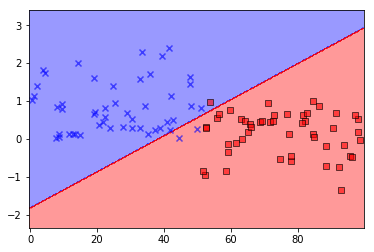

In [244]:
plot_decision_region(x,y,model)

### TODO 

* Data loader 클래스 사용해보기
* 멀티 클래스 데이터셋 적용해보기 (one vs all)

### NEXT 

* 학습이 잘 된건지 어떻게 판단할까? loss값이 줄어들기만 하면 무조건 좋을까?